### We study the number of passengers per month (in thousands) in air transportation, from 1949 to 1960. This time series is available on R (AirPassengers).

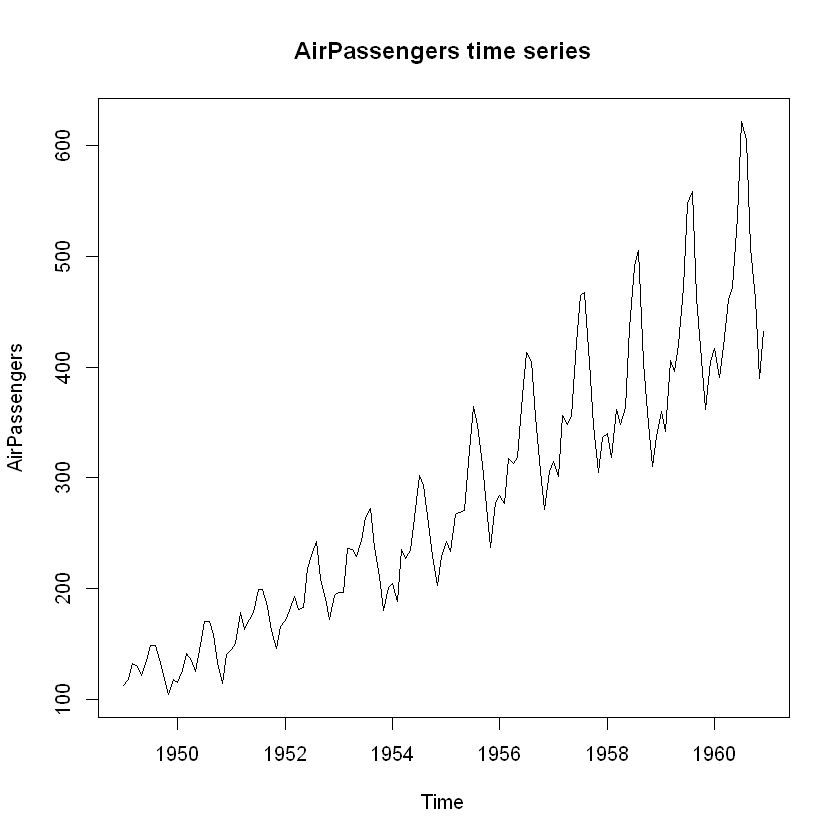

In [28]:
data('AirPassengers')
plot(AirPassengers, main = 'AirPassengers time series')
# we can see on the graph trend and seasonality

In [29]:
length(AirPassengers)

[1] 144

In [30]:
frequency(AirPassengers) # we see that one seasonal unit includes 12 time units, which correspond to 12 months

[1] 12

In [31]:
# Seasonal Decomposition of Time Series by Loess
stl(AirPassengers, s.window = 12)

 Call:
 stl(x = AirPassengers, s.window = 12)

Components
           seasonal    trend    remainder
Jan 1949 -17.896297 123.2952   6.60105106
Feb 1949 -19.246351 123.8486  13.39776274
Mar 1949   6.740732 124.4019   0.85733754
Apr 1949  -1.938243 124.9553   5.98297031
May 1949  -4.047702 125.6700  -0.62232003
Jun 1949  20.761163 126.3848 -12.14593419
Jul 1949  44.083242 127.0995 -23.18276228
Aug 1949  42.033144 127.6714 -21.70456660
Sep 1949  12.027560 128.2433  -4.27088355
Oct 1949 -17.128349 128.8152   7.31312364
Nov 1949 -43.541111 129.7974  17.74373384
Dec 1949 -21.701941 130.7795   8.92241117
Jan 1950 -18.270824 131.7617   1.50914282
Feb 1950 -20.212986 133.1831  13.02988604
Mar 1950   6.442690 134.6045  -0.04720836
Apr 1950  -2.215985 136.0259   1.19004798
May 1950  -4.109657 137.7046  -8.59496612
Jun 1950  21.627307 139.3833 -12.01061723
Jul 1950  45.663797 141.0620 -16.72579261
Aug 1950  43.387283 143.6564 -17.04372034
Sep 1950  12.310825 146.2509  -0.56170264
Oct 1950 -17.54568

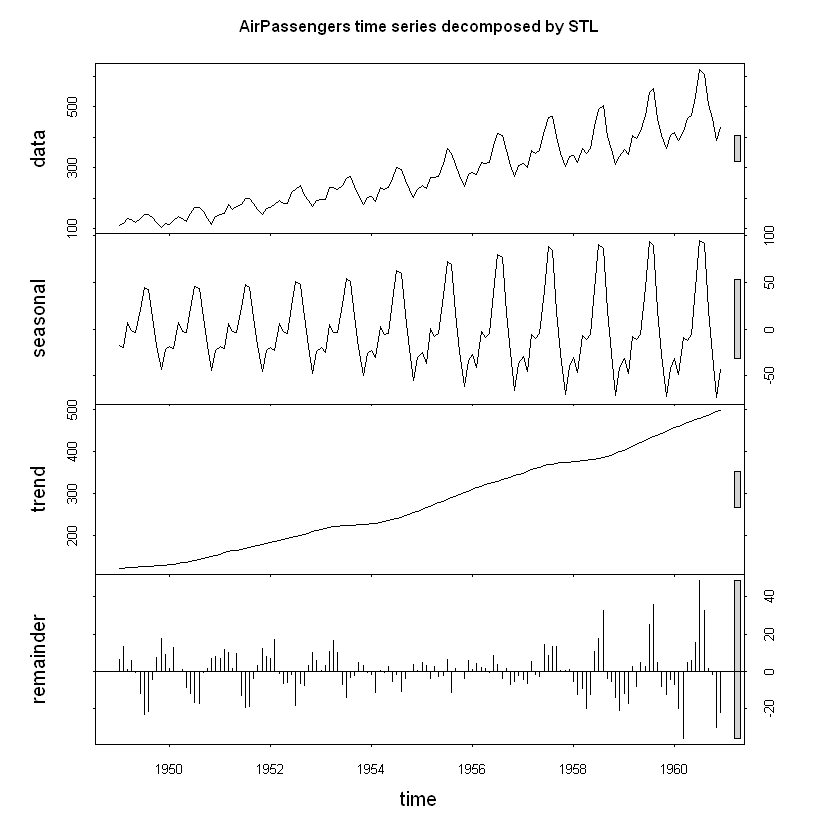

In [32]:
plot(stl(AirPassengers, s.window = 12), main = 'AirPassengers time series decomposed by STL')
# remainder is pretty seasonal

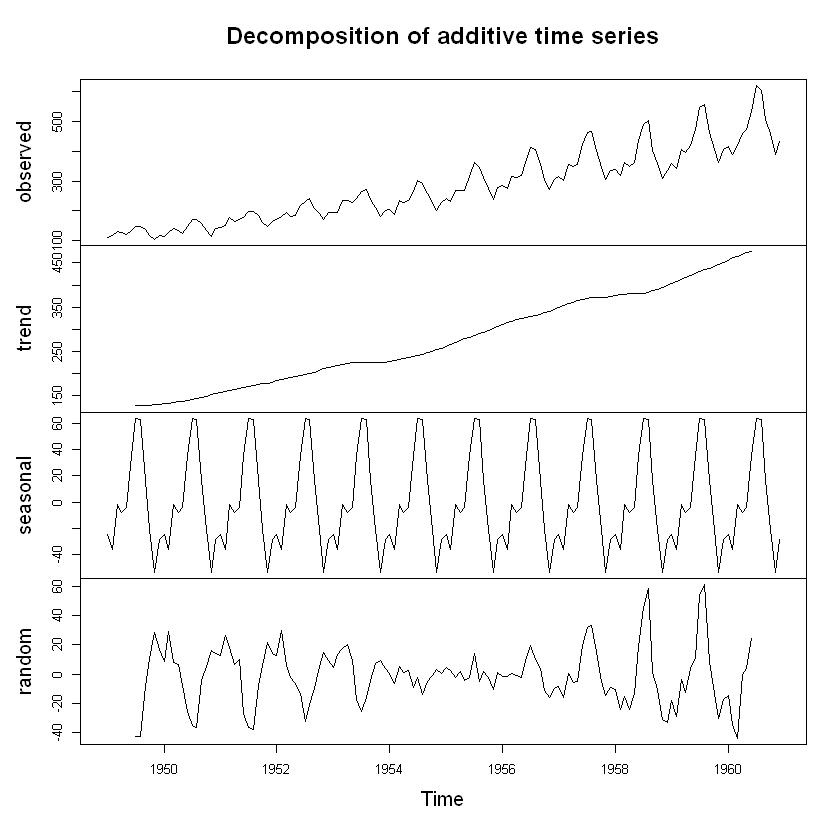

In [33]:
mymodel1 = decompose(AirPassengers, type = "additive")
plot(mymodel1)
# looks like there is still some pattern in the random component (before 1954 and after 1956)
# therefore, the model would need to be improved, as we want only randomness should be in the random component, and all patterns in the seasonal component

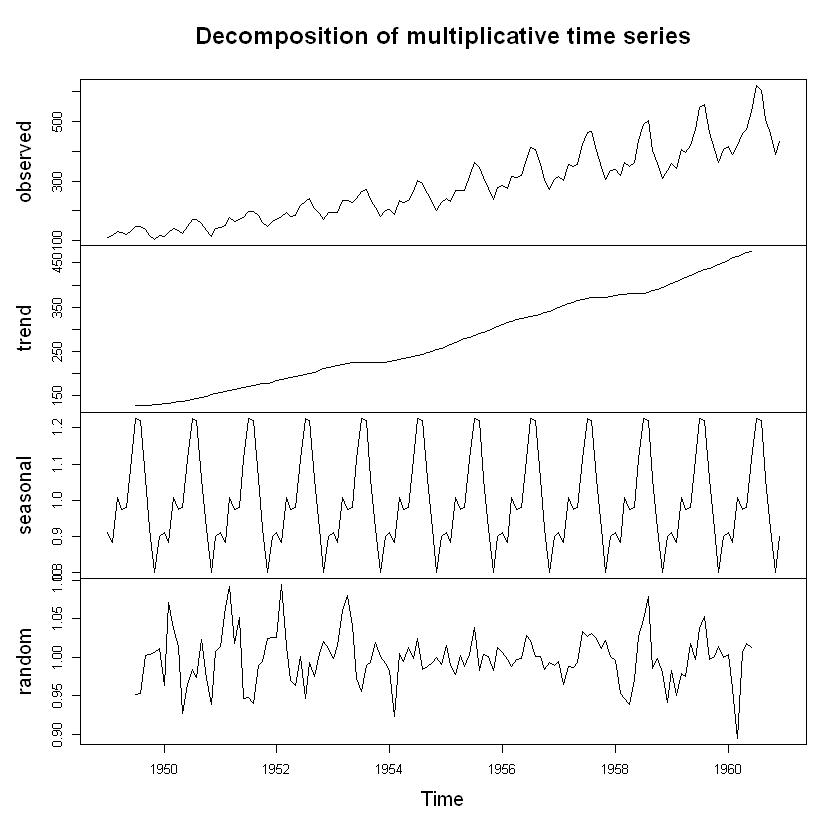

In [34]:
mymodel2 = decompose(AirPassengers, type = "multiplicative")
plot(mymodel2)
# random component looks more random than with the additive ts
# not too bad, but better if it could be improved for total randomness

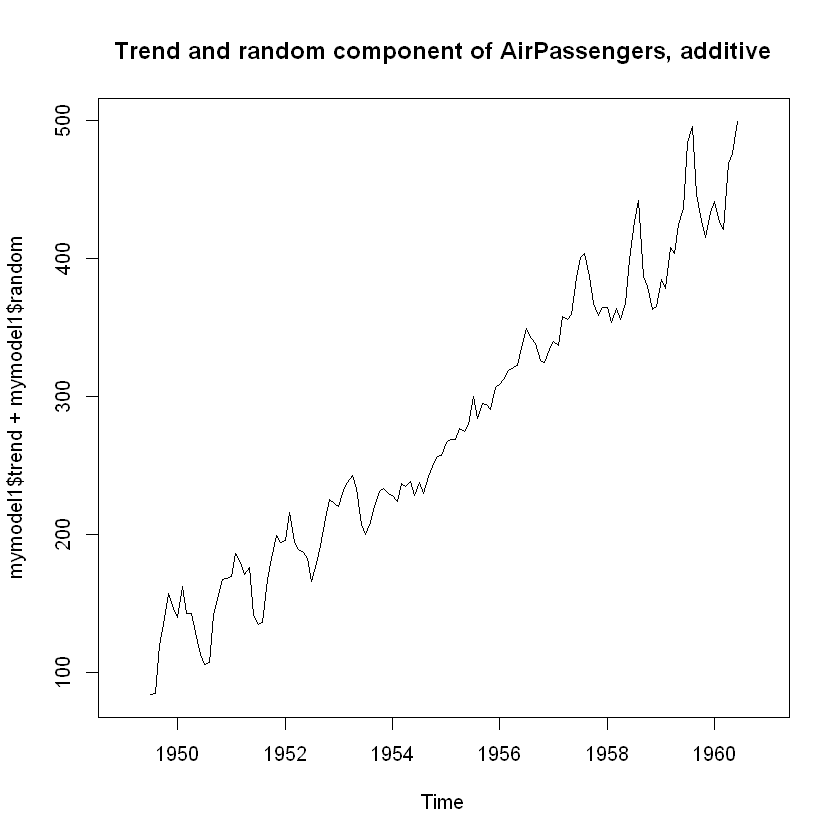

In [40]:
# plot of seasonality-adjusted data according to the model with additive decomposition
plot(mymodel1$trend + mymodel1$random, main = 'Trend and random component of AirPassengers, additive')

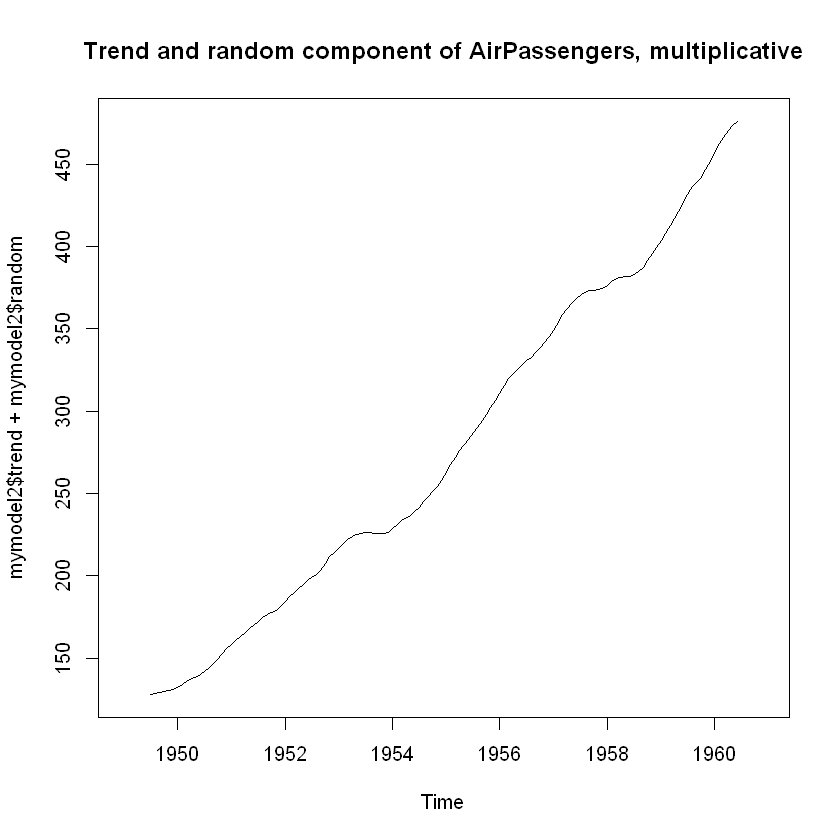

In [41]:
# plot of seasonality-adjusted data according to the model with multiplicative decomposition
plot(mymodel2$trend + mymodel2$random, main = 'Trend and random component of AirPassengers, multiplicative')

### In this case, we should decompose the time series with multiplicative decomposition, as most of the remained is random noise. It could still be improved with some other model.